<a href="https://colab.research.google.com/github/my-quach/R-AI/blob/main/2_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 8.8 MB/s eta 0:00:00


41.12412028150992
66.63036303630362


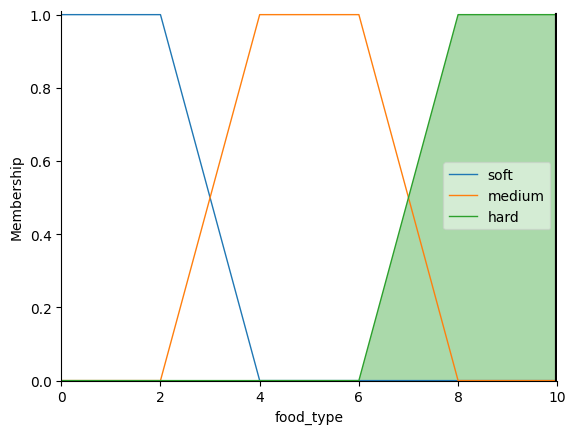

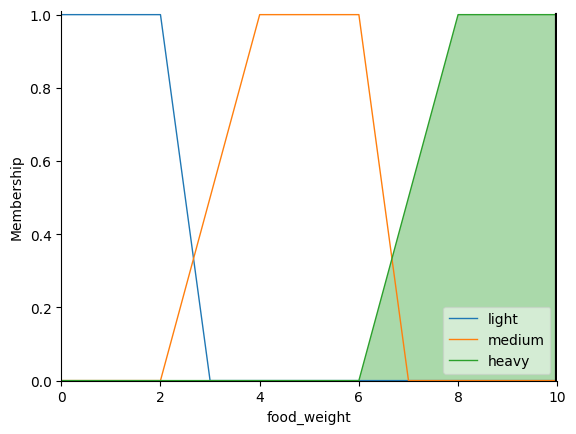

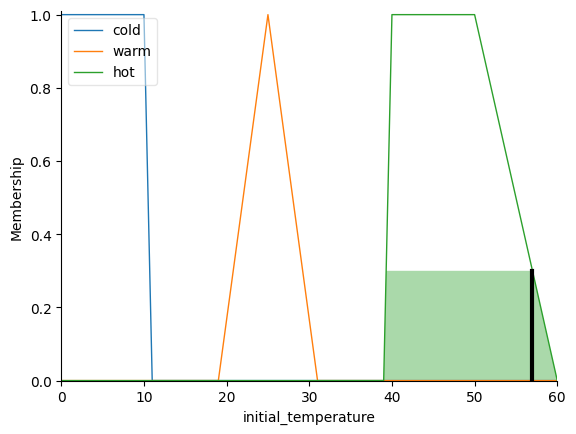

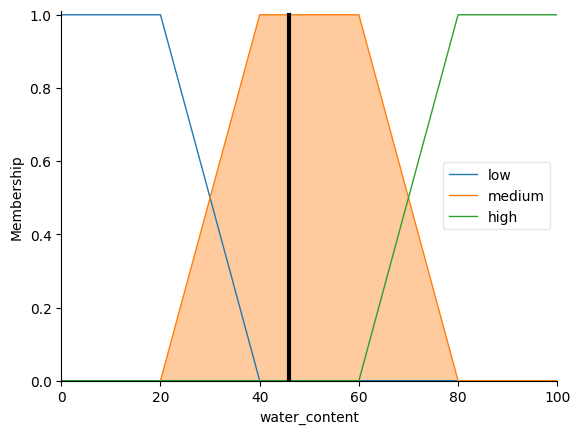

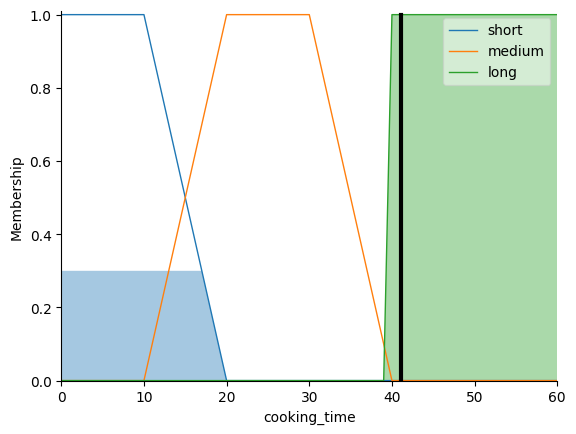

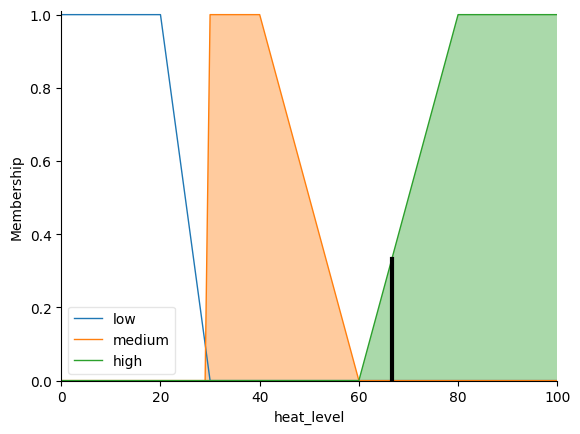

In [4]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
food_type = ctrl.Antecedent(np.arange(0, 11, 1), 'food_type')
food_weight = ctrl.Antecedent(np.arange(0, 11, 1), 'food_weight')
initial_temperature = ctrl.Antecedent(np.arange(0, 61, 1), 'initial_temperature')
water_content = ctrl.Antecedent(np.arange(0, 101, 1), 'water_content')
cooking_time = ctrl.Consequent(np.arange(0, 61, 1), 'cooking_time')
heat_level = ctrl.Consequent(np.arange(0, 101, 1), 'heat_level')
food_type['soft'] = fuzz.trapmf(food_type.universe, [0, 0, 2, 4])
food_type['medium'] = fuzz.trapmf(food_type.universe, [2, 4, 6, 8])
food_type['hard'] = fuzz.trapmf(food_type.universe, [6, 8, 10, 10])
food_weight['light'] = fuzz.trapmf(food_weight.universe, [0, 0, 2, 3])
food_weight['medium'] = fuzz.trapmf(food_weight.universe, [2, 4, 6, 7])
food_weight['heavy'] = fuzz.trapmf(food_weight.universe, [6, 8, 10, 10])
initial_temperature['cold'] = fuzz.trapmf(initial_temperature.universe, [0, 0, 10, 11])
initial_temperature['warm'] = fuzz.trapmf(initial_temperature.universe, [19, 25, 25, 31])
initial_temperature['hot'] = fuzz.trapmf(initial_temperature.universe, [39, 40, 50, 60])
water_content['low'] = fuzz.trapmf(water_content.universe, [0, 0, 20, 40])
water_content['medium'] = fuzz.trapmf(water_content.universe, [20, 40, 60, 80])
water_content['high'] = fuzz.trapmf(water_content.universe, [60, 80, 100, 100])
cooking_time['short'] = fuzz.trapmf(cooking_time.universe, [0, 0, 10, 20])
cooking_time['medium'] = fuzz.trapmf(cooking_time.universe, [10, 20, 30, 40])
cooking_time['long'] = fuzz.trapmf(cooking_time.universe, [40, 40, 60, 60])
heat_level['low'] = fuzz.trapmf(heat_level.universe, [0, 0, 20, 30])
heat_level['medium'] = fuzz.trapmf(heat_level.universe, [29, 30, 40, 60])
heat_level['high'] = fuzz.trapmf(heat_level.universe, [60, 80, 100, 100])


rule1 = ctrl.Rule(food_type['soft'], cooking_time['short'])
rule2 = ctrl.Rule(food_type['medium'], cooking_time['medium'])
rule3 = ctrl.Rule(food_type['hard'], cooking_time['long'])

rule4 = ctrl.Rule(food_weight['light'], heat_level['low'])
rule5 = ctrl.Rule(food_weight['medium'], heat_level['medium'])
rule6 = ctrl.Rule(food_weight['heavy'], heat_level['high'])

rule7 = ctrl.Rule(initial_temperature['cold'], cooking_time['long'])
rule8 = ctrl.Rule(initial_temperature['warm'], cooking_time['medium'])
rule9 = ctrl.Rule(initial_temperature['hot'], cooking_time['short'])

rule10 = ctrl.Rule(water_content['low'], heat_level['low'])
rule11 = ctrl.Rule(water_content['medium'], heat_level['medium'])
rule12 = ctrl.Rule(water_content['high'], heat_level['high'])

rule13 = ctrl.Rule(food_type['soft'] & food_weight['light'] & initial_temperature['hot'] & water_content['low'], (cooking_time['short'], heat_level['low']))
rule14 = ctrl.Rule(food_type['soft'] & food_weight['light'] & initial_temperature['cold'] & water_content['medium'], (cooking_time['short'], heat_level['medium']))
rule15 = ctrl.Rule(food_type['soft'] & food_weight['light'] & initial_temperature['cold'] & water_content['high'], (cooking_time['short'], heat_level['high']))
rule16 = ctrl.Rule(food_type['soft'] & food_weight['medium'] & initial_temperature['hot'] & water_content['low'], (cooking_time['medium'], heat_level['low']))
rule17 = ctrl.Rule(food_type['soft'] & food_weight['medium'] & initial_temperature['cold'] & water_content['medium'], (cooking_time['medium'], heat_level['medium']))
rule18 = ctrl.Rule(food_type['soft'] & food_weight['medium'] & initial_temperature['cold'] & water_content['high'], (cooking_time['medium'], heat_level['high']))
rule19 = ctrl.Rule(food_type['soft'] & food_weight['heavy'] & initial_temperature['hot'] & water_content['low'], (cooking_time['long'], heat_level['low']))
rule20 = ctrl.Rule(food_type['soft'] & food_weight['heavy'] & initial_temperature['cold'] & water_content['medium'], (cooking_time['long'], heat_level['medium']))




fuzzy_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20])
cooking_system = ctrl.ControlSystemSimulation(fuzzy_system)
cooking_system.input['food_type'] = 30
cooking_system.input['food_weight'] = 14
cooking_system.input['initial_temperature'] = 57
cooking_system.input['water_content'] = 46
cooking_system.compute()
print(cooking_system.output['cooking_time'])
print(cooking_system.output['heat_level'])
food_type.view(sim=cooking_system)
food_weight.view(sim=cooking_system)
initial_temperature.view(sim=cooking_system)
water_content.view(sim=cooking_system)
cooking_time.view(sim=cooking_system)
heat_level.view(sim=cooking_system)